In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [12, 4]
}
plt.rcParams.update(params)

In [100]:
class GPR:
    def __init__(self):
        self.x = None
        self.y = None
        
    def train(self,x,y):
        self.x,self.y = x,y
    
    def rbf_kernel(x1, x2, sigma=0.2):
        distance = np.dot(x1 - x2,x1 - x2)
        return math.exp(- distance / (2 * (sigma) ** 2))
    
    def m_kernel(self, X1, X2, kernel):
        n1,n2 = X1.shape[0],X2.shape[0]
        K = np.zeros((n1,n2))
        
        for i in range(n1):
            for j in range(n2):
                K[i,j] = kernel(X1[i],X2[j])
                
        return K
        
    def predict(self,x_test,kernel=rbf_kernel):
        A = self.m_kernel(self.x,self.x,kernel)
        Ainv = np.linalg.inv(A)
        B = self.m_kernel(x_test,self.x,kernel)
        C = self.m_kernel(x_test,x_test,kernel)
        mu_test = B@Ainv@self.y
        sigma_test = C - B@Ainv@B.T
        return mu_test.reshape(-1),sigma_test

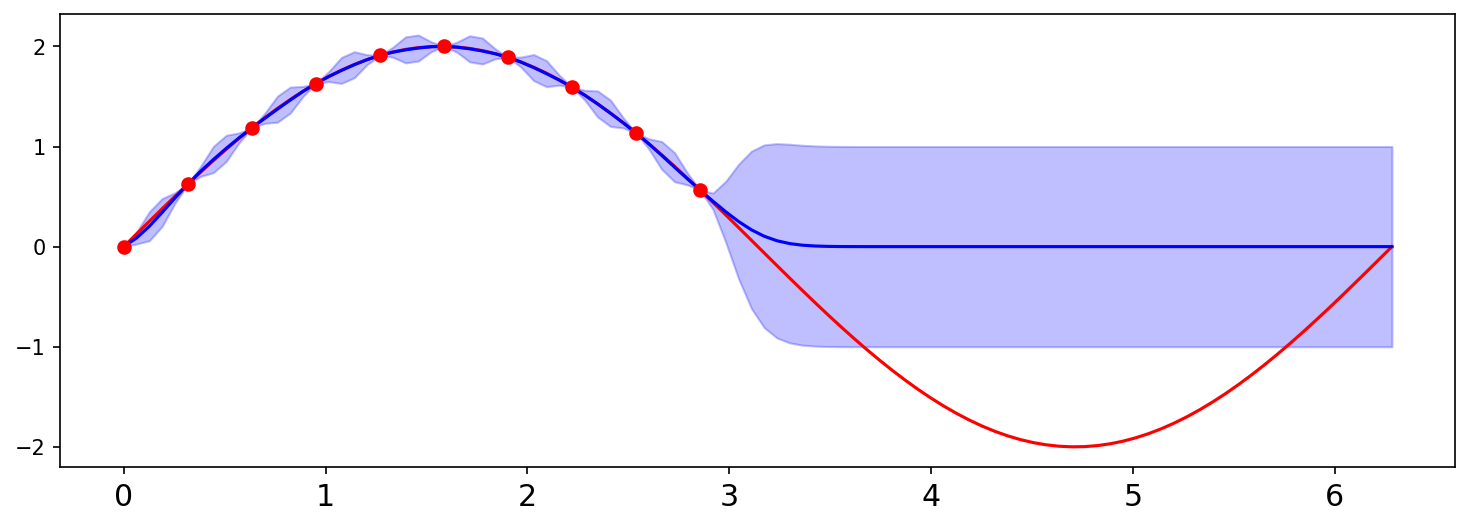

In [101]:
reg = GPR()
n=100
n_train = 20

x = np.linspace(0,2*math.pi,n).reshape(-1,1)
y = 2*np.sin(x)
x_train = x[:n//2:n//n_train]
y_train = y[:n//2:n//n_train]
reg.train(x_train,y_train)
y_pred,sigma_pred = reg.predict(x)
ci = np.diag(sigma_pred)
# plt.errorbar(x.reshape(-1),y_pred.reshape(-1),yerr=ci,capsize=0)
plt.fill_between(x.reshape(-1), (y_pred-ci), (y_pred+ci), color='blue', alpha=0.25)
plt.plot(x,y,"r")
plt.plot(x,y_pred,"b")
plt.plot(x_train,y_train,"ro")
plt.show()